# Jupyter Notebooks

## What is Jupyter?

What you see here is a [Jupyter notebook](https://jupyter.org/). Like CodeExpert, Jupyter is an interactive programming environment for Python and other programming languages. While CodeExpert makes it easier for you to get started with programming, Jupyter notebooks are widely used in practice to share code with others and interactively process, visualize, and explore data.

Jupyter notebooks combine code, output, and comments into a fully editable document (with an .ipynb extension). That means you can change the code and the comments to adapt the output (print output, plots, etc.) accordingly. Jupyter notebooks can also be exported as PDF or HTML files.

**In short:**
- an interactive programming environment for Python (and other programming languages)
- reproducible data analysis
- combines code, output, and comments into one document that can be shared with and edited by others



## Cells

A Jupyter notebook usually consists of several *cells*, of which code and markdown cells are the most important types.

* **Markdown cells** are used for comments, like the text you are reading. In Markdown cells, the text can be formatted, e.g. by adjusting the <span style="font-family:Comic Sans MS">font</span> and <span style="font-size:1.5em">font size</span>, and even links and images can be embedded. [Markdown syntax](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) can be used for this.

![An XKCD comic](https://imgs.xkcd.com/comics/python.png)

* **Code cells** contain Python code to be executed.

![Jupyterhub interface](jupyterhub.png)

## Warmup

Below is a code cell defining two variables, `x` and `y`, and a function `compute_maximum` that returns the maximum of a given list of numbers:

In [1]:
x = 3
y = 7

def compute_maximum(some_list):
    if len(some_list) == 0:
        print("List is empty")
    else:
        current_maximum = some_list[0]
        for element in some_list:
            if element > current_maximum:
                current_maximum = element
        return current_maximum

***Exercise 1.0.*** Execute the code cell above using `CTRL + Enter` on Windows or `CMD + Enter` on MacOS. You can now refer to the initialized variables and functions throughout the rest of the notebook.

***Exercise 1.1.*** Now, insert a *new* code cell below (using the **+** menu button). In this cell, initialize a variable with a list containing `x + y`, `x * y`, and `x - y`. Then, apply the function `compute_maximum` above to the list you have defined.

In [2]:
mylist = [x + y, x * y, x - y]
compute_maximum(mylist)

21

***Exercise 1.2.*** Execute the code cell below *multiple* times in a row and observe the output. What is happening and why?

In [6]:
x = x * 3
print(str(x))

243


***Exercise 1.3.*** Now, insert a new *Markdown* cell below. Format the cell to include a list and text in italic and/or bold typeface.

* *This*
* **is**
* ***an***
* example!

**Important:** Unlike CodeExpert, where you have to run the entire script, a Jupyter notebook allows you to run cells in *any* order. Therefore, before sharing the notebook with others, it is recommended to restart it and run it from the top to bottom (via the "restart the kernel" menu button) to ensure that the results are *reproducible*.

# Data Analysis in Jupyter

## Introduction

Below we show how data analysis can be conducted in a Jupyter notebook. We will develop a simple predictive model to classify breast tumors into benign and malignant, given some numerical properties. We will explore the [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) dataset, which you can find saved as the file `data_simplified.csv`.

We will almost exclusively use modules you have already learned about in the lecture. An exception is the `sklearn` module useful for designing predictive models. We will use a simple statistical model –– logistic regression, familiar to you from previous lectures. Next semester, you will learn more about the `sklearn` module in the *Data Science for Medicine* course.

## Loading the Modules

***Exercise 2.0.*** Load `numpy` and `pandas` modules in the code cell below. In Jupyter notebooks, library imports work similarly to the CodeExpert.

In [7]:
# TODO: your code here
import numpy as np
import pandas as pd

We will also need `matplotlib` for plotting and `LogisticRegression` from `sklearn` to fit a predictive model. 

In [8]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

## Loading the Data

We will now load the dataset as a `pandas.DataFrame` from the CSV file `data_simplified.csv`.

***Exercise 2.1.*** Read the documentation for the [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function. Then, apply the function to load the Breast Cancer Wisconsin dataset below.

In [9]:
# TODO: complete this code cell
data = pd.read_csv('data_simplified.csv')

***Exercise 2.2.*** How can we display just the first few rows of the loaded `pandas.DataFrame`? Implement your solution in the code cell below. *Hint*: you may find the [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) documentation useful.

In [10]:
# TODO: your code here
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


***Exercise 2.3.*** How many rows and columns does the dataset have? What do rows and columns correspond to? 

In [11]:
# TODO: your code here
data.shape

(569, 31)

Looking at the data above, we can already make the following conclusions:
* Each row contains numeric information about the properties of a tumor, such as its radius, texture, etc.
* The column `diagnosis` tells us whether the tumor is benign (`B`) or malignant (`M`)

## Exploratory Analysis

In the following, we will perform a brief exploratory data analysis before finally turning to predictive modeling.

### Histograms

A histogram displays how often a particular value occurs in the dataset (see the figure below for more terminology). Using histograms, we can visualize distributions of numerical and categorical variables. We can color study subject subgroups differently depending on their clinical condition. To plot a histogram, we will use the [`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function from the module `matplotlib`.

![histogram terminology](http://diagrammm.com/img/diagrams/histogram-terminology.svg)

***Exercise 2.4.*** Inspect the code cell below carefully. What does it do? Execute the code and observe its output. What conclusions can be made from the resulting plot?

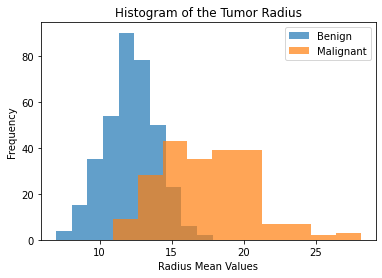

In [12]:
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean, alpha=0.7, label="Benign")
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean, alpha=0.7, label="Malignant")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of the Tumor Radius")
plt.show()

### Correlation Analysis

Pearson's correlation coefficient measures the strength of the linear association between two variables. Herein, we are interested in the correlation between the malignancy of a tumor and observed numerical variables.

***Exercise 2.5.*** Function [`pandas.DataFrame.corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) computes the pairwise correlation between variables in the `pandas.DataFrame`. Read the documentation and complete the code cell below to compute correlations for the loaded dataset. Which variable has the strongest correlation with malignancy? Which correlation is the weakest? *Hint*: set the `numeric_only` argument to `False`.

In [13]:
# TODO: complete this code cell
data['diagnosis'] = (data['diagnosis'] == 'M').astype(int)
data.corr(numeric_only=False)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


## Predictive Modeling

Now, let's predict the tumor type (benign vs. malignant) based on the rest of the variables. 

***Exercise 2.6.*** Define two `pandas.DataFrame` variables: `X` and `y`. `X`, the so-called design matrix, should include *all* variables from the dataset *except* for the diagnosis. `y`, the so-called target variable, should be assigned with the diagnosis column from the loaded dataset.

In [14]:
# TODO: complete this code cell
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

To fit a model on the data, or "train" it (a common term in Machine Learning), we need to first initialize a desired model from the `sklearn` module and then use the `fit` function.

***Exercise 2.7.*** Read the documentation for [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (*hint*: pay special attention to the examples in the documentation). In the code cell below, initialize a logistic regression model and fit it on `X` and `y`.

In [15]:
# TODO: complete this code cell
lr_model = LogisticRegression()
lr_model.fit(X, y)

/local/home/anaconda3/envs/dat-sci-med-unsupervised/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

We can now use the trained logistic regression model to "diagnose" patients. This can be done using the `predict` function (see the documentation for [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

***Exercise 2.8.*** Using the `predict` function, compute the predictions for the first ten patients in `X`.

In [16]:
# TODO: your code here
lr_model.predict(X.iloc[0:10])

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

We can also evaluate how "good" our model is at predicting the ground truth. We can use `score` function to compute the model's *accuracy* on the given data (see the documentation for [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)), although alternative evaluation metrics exist. 

***Exercise 2.9.*** Use the `score` function to evaluate the accuracy of the logistic regression model on the training data given by `X` and `y`. Is the accuracy high? Would you use this model in practice?

In [17]:
# TODO: your code here
lr_model.score(X, y)

0.9472759226713533

***Disclaimer:*** Here, we have trained and evaluated the model on the *same* dataset. Therefore, it is likely that the accuracy above is overly optimistic (think of solving exercises in class and then having an exam on the *exact same* exercises). Ideally, we should train and test our models on two separate datasets.

## Concluding Remarks

You will learn more about the data cleaning, visualization and application of machine learning methods in the *Data Science for Medicine* course. If you are interested in exploring challenges in applied data analysis on your own, [Kaggle](https://www.kaggle.com) platform might be something for you!